In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp


In [3]:
plt.rc('legend', fontsize=20) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20

In [4]:
# load opsim database
dbpath_v15 = "/home/idies/workspace/lsst_cadence/FBS_1.5/"  # path to all opsim databases

dbpath_v17 = "/home/idies/workspace/lsst_cadence/FBS_1.7/"

dbpath_v171 = "/home/idies/workspace/lsst_cadence/FBS_1.7.1/"

# output directory
dataRawDir = '/home/idies/workspace/Temporary/lixl/scratch/outDir/tGaps/'


In [5]:
# get the name of all opsim dbs 
import glob

workpath = os.getcwd()
#workpath = '/home/idies/workspace/Storage/lixl/persistent/LSST_OpSim/unknowns'

os.chdir(dbpath_v15)  # change to opsim database directory
dblist_v15 = glob.glob('*.db') 

os.chdir(dbpath_v17)  # change to opsim database directory
dblist_v17 = glob.glob('*.db') 

os.chdir(dbpath_v171)  # change to opsim database directory
dblist_v171 = glob.glob('*.db') 

os.chdir(workpath) # change back to work directory

dblist_v15.sort()
dblist_v17.sort()
dblist_v171.sort()

dblist_all = dblist_v15 + dblist_v17 + dblist_v171


In [5]:
len( dblist_all )

170

In [6]:
fltpairs = ['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy',
           'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy' ]

fltpairs_db = ['db','uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy',
           'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy' ]


In [7]:
pwd

'/home/idies/workspace/Storage/lixl/persistent/LSSTunknowns/tdAnom'

In [34]:
msname= 'ALL'

dbname = dblist_v15[5]

dataRaw = pd.read_pickle(dataRawDir+'/tgaps_{}_{}.pkl'.format(dbname,msname))



In [35]:
dataRaw['baseline_v1.5_10yrs.db'] ['gi'].head(3)

,pixId,Nv,dT_lim
0,621,0,[]
1,622,0,[]
2,623,0,[]


In [36]:
def get_Nv(df, tmin=0, tmax=2):
    """
    tmin, tmax:  in days
    return Nv
    """
    dT_all = df["dT_lim"]
    dT_tlim = dT_all[(dT_all>=tmin)&(dT_all<=tmax)] 
    Nv = len(dT_tlim)
    
    return Nv


In [37]:
# get the median of N visits for each filter pair
# use baseline for a threshold
#dataRaw = df_SMC_allsky

Nvth = {}

#tmax = 1.5 / 24  # in days
tmax = 2 # time range for different-filter pairs

for fltpair in fltpairs: 
    df = dataRaw['baseline_v1.5_10yrs.db'] [fltpair]
    
    if fltpair[0]!=fltpair[1]:
        df['Nv'] = df.apply(get_Nv, axis=1, args=(0, tmax))
        
    Nvth[fltpair] = np.median( df.Nv ) 

Nvth 

  

{'uu': 1711.0,
 'ug': 67.0,
 'ur': 76.0,
 'ui': 24.0,
 'uz': 2.0,
 'uy': 0.0,
 'gg': 3570.0,
 'gr': 130.0,
 'gi': 45.0,
 'gz': 13.0,
 'gy': 5.0,
 'rr': 20301.0,
 'ri': 185.0,
 'rz': 37.0,
 'ry': 18.0,
 'ii': 20582.0,
 'iz': 200.0,
 'iy': 92.0,
 'zz': 16470.0,
 'zy': 220.0,
 'yy': 18431.0}

In [29]:
def plot_mwd( RA, Dec, c, org=0, ax=None, title='Mollweide projection', 
             projection='mollweide', marker='o', s=10, vmin=0, vmax=None, colorbar=True, cmap=plt.cm.viridis):
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    
    Examples:
    >>> fig, ax = plt.subplots(1, 1, figsize=(8, 8), 
                            subplot_kw={'projection': 'mollweide'}); 
        plot_mwd(ax, x, y, c, title='') 
    '''
    if ax==None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 8), 
                            subplot_kw={'projection': projection}); 
    if vmax is None:
        vmax = c.max()
    
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+org,360)
    # fig = plt.figure(figsize=(10, 5))
    # ax = fig.add_subplot(111, projection=projection, facecolor ='LightCyan')
    # ax = fig.add_subplot(111, projection=projection, facecolor ='honeydew')
    sc = ax.scatter(np.radians(x), np.radians(Dec), c=c, s=s,
                    marker=marker, vmin=vmin, vmax=vmax,
                    cmap=cmap)  # convert degrees to radians
    ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title(title)
    #ax.title.set_fontsize(15)
    ax.set_xlabel("RA")
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel("Dec")
    ax.yaxis.label.set_fontsize(12)
    ax.grid(True)
    if colorbar:
        cbar = plt.colorbar(sc, ax=ax, orientation="horizontal")
        #cbar = plt.colorbar(sc, ax=ax, ticks=np.arange(vmin, vmax, (vmax-vmin)/3 ), orientation='horizontal')
        #cbar.ax.set_xticklabels(['Low', 'Medium', 'High'])  # horizontal colorbar
    return ax, cbar
    #cbar.set_clim(-2.0, 2.0)


def pix2radec(nside, ipix, degree=True):
    """from ipix to ra/dec"""
    
    theta, phi = hp.pix2ang(nside, ipix)
    ra = phi
    dec = np.pi/2. - theta
    if degree:
        ra = np.rad2deg(ra)
        dec = np.rad2deg(dec)
    return ra, dec

In [38]:
#starDens = np.load('starDens16.npz')['starDens']

Fields = pd.read_csv("./data/Fields_nside16.csv")
starDens = Fields['starDensity_r25'].values
TRIstarDens = Fields['TRIstarDensity_r25'].values


gr 1462 1015
gr 1015 165
gr 1428 1118
gr 1118 40
gr 1463 1216
gr 1216 186
gr 1462 1197
gr 1197 189


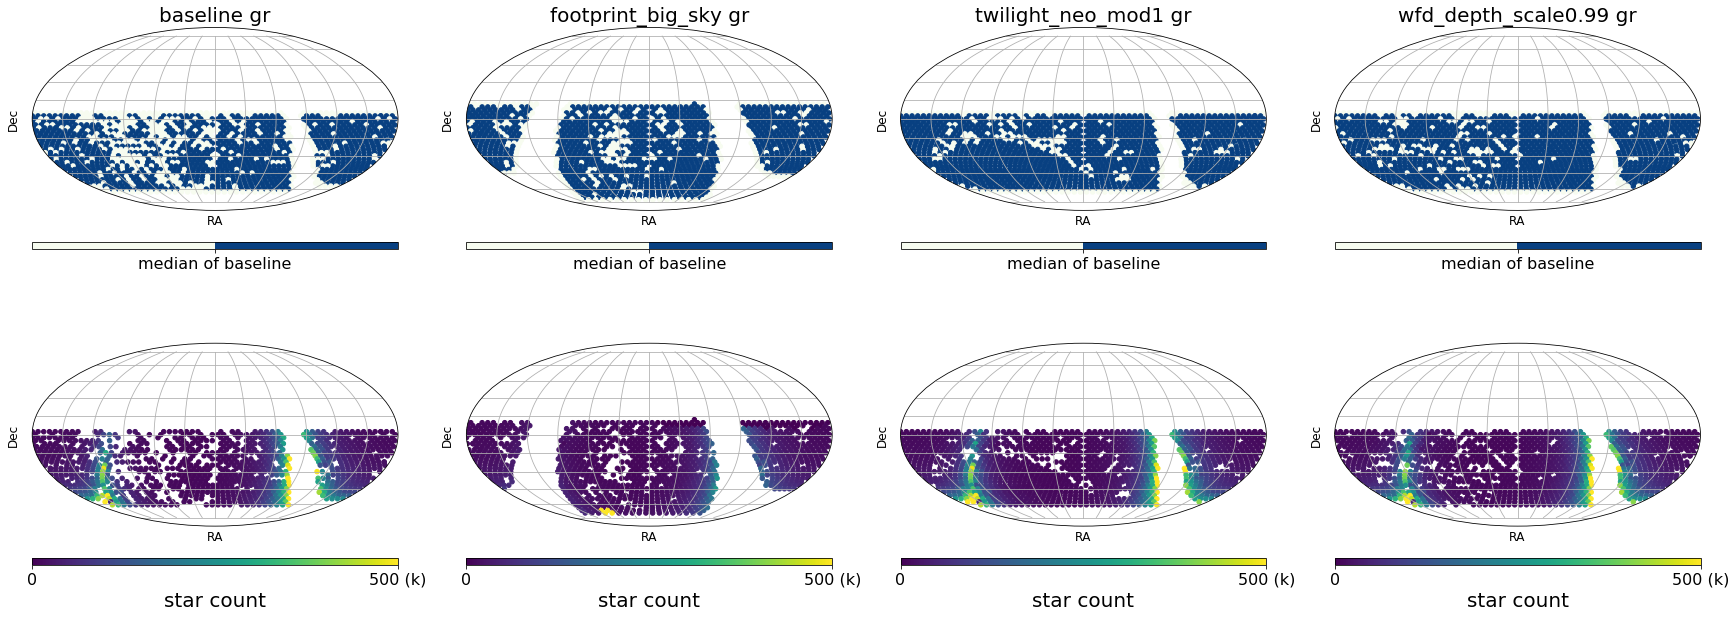

In [39]:
dbnames = [ 
     'baseline_v1.5_10yrs.db',
     'footprint_big_skyv1.5_10yrs.db', 
     'twilight_neo_mod1_v1.5_10yrs.db',
     'wfd_depth_scale0.99_v1.5_10yrs.db', 
     #'baseline_2snaps_v1.5_10yrs.db', 
     ]

msname = 'WFD'
tmax = 2 # in day
fltpair = 'gr'

fig, axs = plt.subplots(2, len(dbnames), figsize=( 6*len(dbnames), 9), subplot_kw={'projection': 'mollweide'}, constrained_layout=True);

axs = axs.flatten()

for i, dbname in enumerate(dbnames):
    thres = Nvth[fltpair]
    
    dataRaw = pd.read_pickle(dataRawDir+'/tgaps_{}_{}.pkl'.format(dbname,msname))
    
    df = dataRaw[dbname][fltpair]
    
    if fltpair[0]!=fltpair[1]:
        df['Nv'] = df.apply(get_Nv, axis=1, args=(0, tmax))

    idx = df.Nv >= thres

    ipix = df['pixId'].values 
    
    RA, Dec = pix2radec(nside=16, ipix=ipix)
    
    c = df['Nv'].values
    print(fltpair, len(c), len(c[c>=thres]))
    
    dbname = dbname.replace('_v1.5_10yrs.db', '').replace('v1.5_10yrs.db', '')
    ax, cbar = plot_mwd(RA, Dec, c, ax=axs[i], title=dbname +' '+fltpair, 
                        vmin=thres, vmax=thres+1, s=20,
                        cmap=plt.cm.get_cmap('GnBu', 2))
    ax.set_xticklabels([])     
    ax.set_yticklabels([]) 
    
    cbar.set_ticks([thres + .5])
    cbar.ax.set_xticklabels(['median of baseline'])
    
    # plot star density 
    ipix = ipix[ idx ]
    RA, Dec = pix2radec(nside=16, ipix=ipix)
    
    c = TRIstarDens[ipix] / 1000 # in unit (k)
    print(fltpair, len(c), len(c[c>=Nvth[fltpair]]))
    
    ax, cbar = plot_mwd(RA, Dec, c, ax=axs[i + len (dbnames) ], title='', 
                        vmin=0, vmax=500, s=20,
                        cmap=plt.cm.get_cmap('viridis', ))
    ax.set_xticklabels([])     
    ax.set_yticklabels([]) 
    
    cbar.set_ticks([0, 500])
    cbar.ax.set_xticklabels([0, '500 (k)'])
    cbar.ax.set_xlabel('star count')


fig.savefig('figures/footprint_wfd.pdf')

gr 2032 748
gr 748 118


/home/idies/lsst/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/matplotlib/projections/geo.py:421: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


gr 1970 960
gr 960 34
gr 2338 1122
gr 1122 161


/home/idies/lsst/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/matplotlib/projections/geo.py:421: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


gr 2026 1018
gr 1018 155


/home/idies/lsst/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/matplotlib/projections/geo.py:421: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


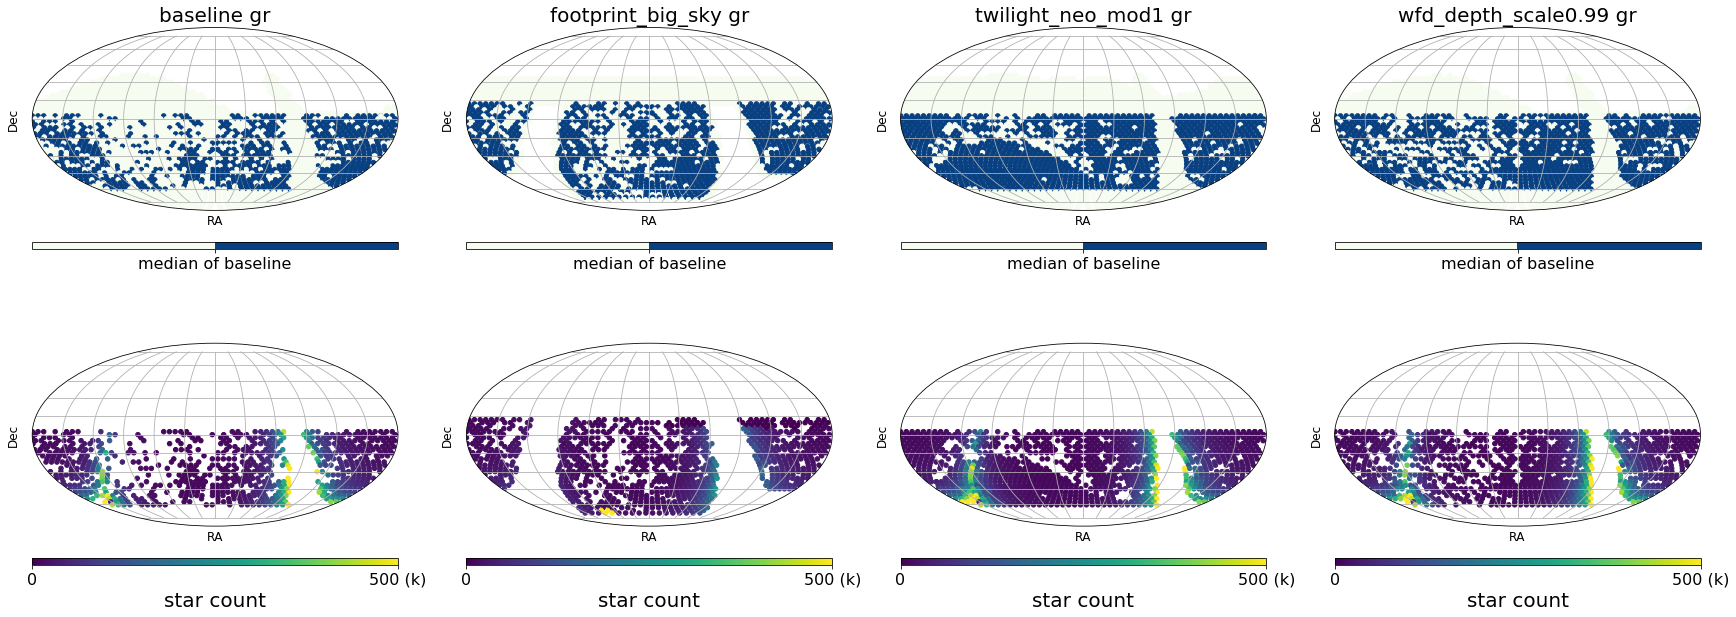

In [23]:
dbnames = [ 
     'baseline_v1.5_10yrs.db',
     'footprint_big_skyv1.5_10yrs.db', 
     'twilight_neo_mod1_v1.5_10yrs.db',
     'wfd_depth_scale0.99_v1.5_10yrs.db', 
     #'baseline_2snaps_v1.5_10yrs.db', 
     ]

msname = 'ALL'
tmax = 2 # in day
fltpair = 'gr'

fig, axs = plt.subplots(2, len(dbnames), figsize=( 6*len(dbnames), 9), subplot_kw={'projection': 'mollweide'}, constrained_layout=True);

axs = axs.flatten()

for i, dbname in enumerate(dbnames):
    thres = Nvth[fltpair]
    
    dataRaw = pd.read_pickle(dataRawDir+'/tgaps_{}_{}.pkl'.format(dbname,msname))
    
    df = dataRaw[dbname][fltpair]
    
    if fltpair[0]!=fltpair[1]:
        df['Nv'] = df.apply(get_Nv, axis=1, args=(0, tmax))

    idx = df.Nv >= thres

    ipix = df['pixId'].values 
    
    RA, Dec = pix2radec(nside=16, ipix=ipix)
    
    c = df['Nv'].values
    print(fltpair, len(c), len(c[c>=thres]))
    
    dbname = dbname.replace('_v1.5_10yrs.db', '').replace('v1.5_10yrs.db', '')
    ax, cbar = plot_mwd(RA, Dec, c, ax=axs[i], title=dbname +' '+fltpair, 
                        vmin=thres, vmax=thres+1, s=20,
                        cmap=plt.cm.get_cmap('GnBu', 2))
    ax.set_xticklabels([])     
    ax.set_yticklabels([]) 
    
    cbar.set_ticks([thres + .5])
    cbar.ax.set_xticklabels(['median of baseline'])
    
    # plot star density 
    ipix = ipix[ idx ]
    RA, Dec = pix2radec(nside=16, ipix=ipix)
    
    c = TRIstarDens[ipix] / 1000 # in unit (k)
    print(fltpair, len(c), len(c[c>=Nvth[fltpair]]))
    
    ax, cbar = plot_mwd(RA, Dec, c, ax=axs[i + len (dbnames) ], title='', 
                        vmin=0, vmax=500, s=20,
                        cmap=plt.cm.get_cmap('viridis', ))
    ax.set_xticklabels([])     
    ax.set_yticklabels([]) 
    
    cbar.set_ticks([0, 500])
    cbar.ax.set_xticklabels([0, '500 (k)'])
    cbar.ax.set_xlabel('star count')


fig.savefig('figures/footprint_wfd.pdf')

gg 1460 785
gg 785 0
gg 1428 1073
gg 1073 1
gg 1461 1327
gg 1327 0
gg 1460 1132
gg 1132 0


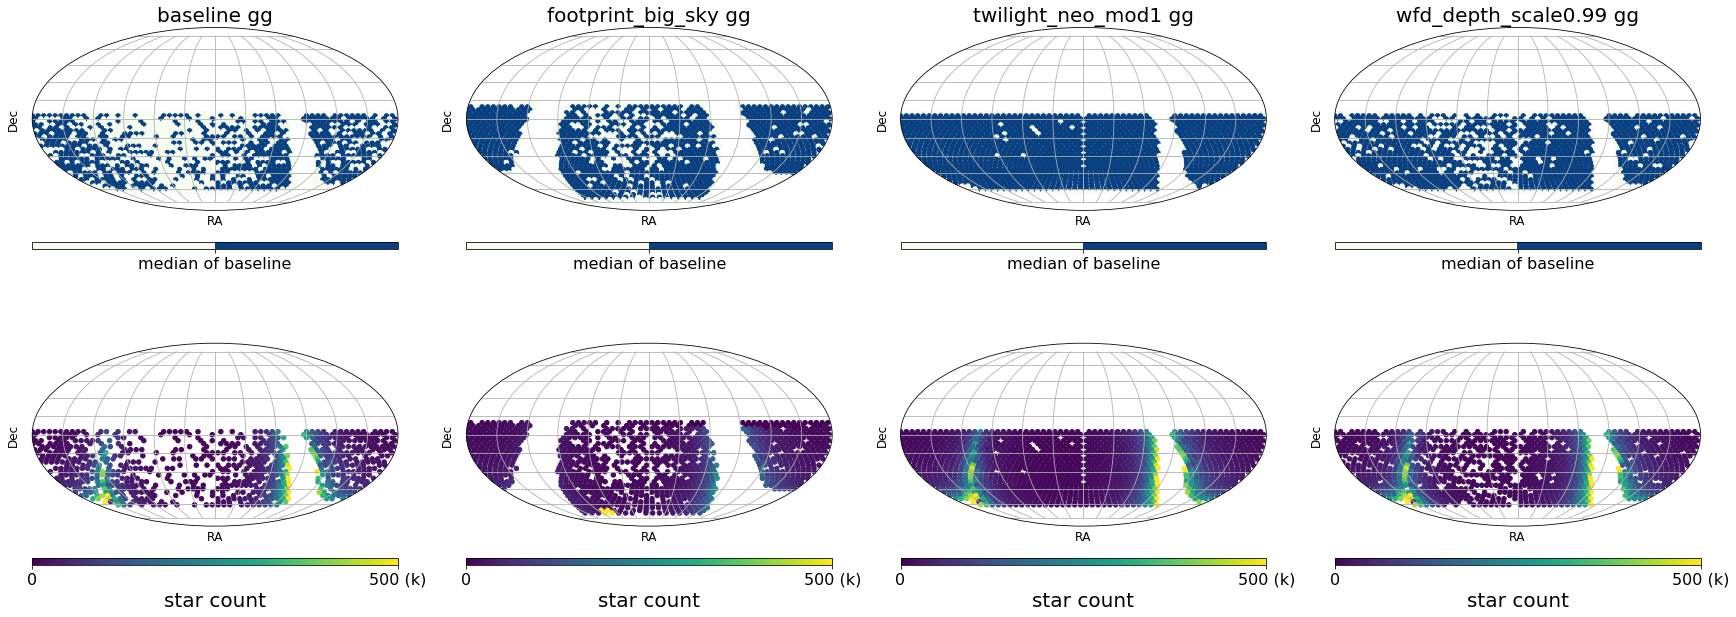

In [23]:
dbnames = [ 
     'baseline_v1.5_10yrs.db',
     'footprint_big_skyv1.5_10yrs.db', 
     'twilight_neo_mod1_v1.5_10yrs.db',
     'wfd_depth_scale0.99_v1.5_10yrs.db', 
     #'baseline_2snaps_v1.5_10yrs.db', 
     ]

msname = 'WFD'
tmax = 2 # in day
fltpair = 'gg'

fig, axs = plt.subplots(2, len(dbnames), figsize=( 6*len(dbnames), 9), subplot_kw={'projection': 'mollweide'}, constrained_layout=True);

axs = axs.flatten()

for i, dbname in enumerate(dbnames):
    thres = Nvth[fltpair]
    
    dataRaw = pd.read_pickle(dataRawDir+'/tgaps_{}_{}.pkl'.format(dbname,msname))
    
    df = dataRaw[dbname][fltpair]
    
    if fltpair[0]!=fltpair[1]:
        df['Nv'] = df.apply(get_Nv, axis=1, args=(0, tmax))

    idx = df.Nv >= thres

    ipix = df['pixId'].values 
    
    RA, Dec = pix2radec(nside=16, ipix=ipix)
    
    c = df['Nv'].values
    print(fltpair, len(c), len(c[c>=thres]))
    
    dbname = dbname.replace('_v1.5_10yrs.db', '').replace('v1.5_10yrs.db', '')
    ax, cbar = plot_mwd(RA, Dec, c, ax=axs[i], title=dbname +' '+fltpair, 
                        vmin=thres, vmax=thres+1, s=20,
                        cmap=plt.cm.get_cmap('GnBu', 2))
    ax.set_xticklabels([])     
    ax.set_yticklabels([]) 
    
    cbar.set_ticks([thres + .5])
    cbar.ax.set_xticklabels(['median of baseline'])
    
    # plot star density 
    ipix = ipix[ idx ]
    RA, Dec = pix2radec(nside=16, ipix=ipix)
    
    c = TRIstarDens[ipix] / 1000 # in unit (k)
    print(fltpair, len(c), len(c[c>=Nvth[fltpair]]))
    
    ax, cbar = plot_mwd(RA, Dec, c, ax=axs[i + len (dbnames) ], title='', 
                        vmin=0, vmax=500, s=20,
                        cmap=plt.cm.get_cmap('viridis', ))
    ax.set_xticklabels([])     
    ax.set_yticklabels([]) 
    
    cbar.set_ticks([0, 500])
    cbar.ax.set_xticklabels([0, '500 (k)'])
    cbar.ax.set_xlabel('star count')


fig.savefig('figures/footprint_wfd.pdf')

gg 1460


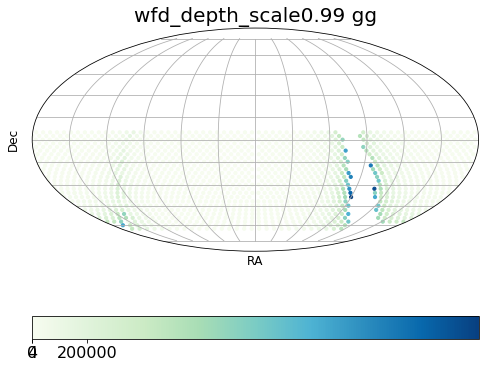

In [24]:

fig, axs = plt.subplots(1, 1, figsize=(8, 8), subplot_kw={'projection': 'mollweide'}, )#constrained_layout=True);

ax = axs
#dbname = dblist_all[3]
#df = dataraw['{}{}'.format(f0,f1)][dbname]
ipix = df['pixId'].values

RA, Dec = pix2radec(nside=16, ipix=ipix)

c = starDens[ipix]
print(fltpair, len(c))

ax, cbar = plot_mwd(RA, Dec, c, ax=ax, title=dbname +' '+fltpair, vmin=0, vmax=None, cmap=plt.cm.get_cmap('GnBu'))
ax.set_xticklabels([])     
ax.set_yticklabels([]) 

cbar.set_ticks([0, 200000, 4])
#cbar.ax.set_xticklabels(['th'])

